<a href="https://colab.research.google.com/github/asarma2012/DataScience-Analytics-Engineering-ML-Projects/blob/main/US-Senate-Voting-Analysis/US_Senate_Voting_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Senate Voting Analysis

## About the Dataset
Here, data from the 114th Congress has been analyzed to see how deep the divide in American politcs was at that time between Democrats and Republicans in the Senate. Despite the apparent political divide, a few senators did break with their party. The U.S Senate during the 114th Congress consisted of 54 Republicans, 44 Democrats, and 2 Independents. 

In [65]:
import pandas as pd
votes = pd.read_csv("114_congress.csv")
votes_copy = votes.copy()
print(votes.to_string())

          name party state  00001  00004  00005  00006  00007  00008  00009  00010  00020  00026  00032  00038  00039  00044  00047
0    Alexander     R    TN    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0
1       Ayotte     R    NH    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0
2      Baldwin     D    WI    1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0
3     Barrasso     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0
4       Bennet     D    CO    0.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0
5   Blumenthal     D    CT    1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0
6        Blunt     R    MO    0.0    1.0    1.0    1.0    1.0    0.0    1.0 

Also this dataset includes the voting records of all 100 Senators for various Senate Bills (i.e 00001, 00002, etc). Bills with approval over 0.5 were passed and approved by the Senate. 

In [66]:
print(votes['party'].value_counts())
votes[3:].mean()

R    54
D    44
I     2
Name: party, dtype: int64


00001    0.324742
00004    0.572165
00005    0.530928
00006    0.943299
00007    0.541237
00008    0.417526
00009    0.561856
00010    0.984536
00020    0.530928
00026    0.541237
00032    0.412371
00038    0.474227
00039    0.525773
00044    0.453608
00047    0.371134
dtype: float64

## Grouping Senators

Given the existence of the two-party system in the U.S Government and the growing tendency of voting to be along party lines, it makes sense to use a K-Means Clustering model with 2 clusters. Then for each Senator, the Euclidean distance would be computed for grouping/clustering purposes. Then, the composition of each cluster got identified.

In [67]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])
labels = kmeans_model.labels_
votes['X'] = senator_distances[:,0]
votes['Y'] = senator_distances[:,1]
votes['Kmeans cluster'] = labels
print(votes[['name','party','X','Y','Kmeans cluster']].to_string())

          name party         X         Y  Kmeans cluster
0    Alexander     R  1.313478  3.121416               0
1       Ayotte     R  2.053400  2.614625               0
2      Baldwin     D  3.416517  0.339607               1
3     Barrasso     R  0.241984  3.420048               0
4       Bennet     D  2.968660  1.438340               1
5   Blumenthal     D  3.416517  0.339607               1
6        Blunt     R  0.241984  3.420048               0
7       Booker     D  3.416517  0.339607               1
8      Boozman     R  0.241984  3.420048               0
9        Boxer     D  3.307588  0.312875               1
10       Brown     D  3.416517  0.339607               1
11        Burr     R  0.967341  3.270585               0
12    Cantwell     D  3.416517  0.339607               1
13      Capito     R  0.539456  3.348756               0
14      Cardin     D  3.416517  0.339607               1
15      Carper     D  3.126956  1.180848               1
16       Casey     D  3.135361 

## Check the Democrats who broke with Democratic Party
It looks like both of the clusters mostly broke down along party lines. The first cluster (labeled 0) contains 3 Democrats and 54 Republicans. The second cluster (labeled 1) contains 41 Democrats, and both Independents.

No Republicans seem to have broken party ranks to vote with the Democrats, but 3 Democrats are more similar to Republicans in their voting than their own party. Let's explore these 3 in more depth and understand the motives.

In [68]:
democratic_outliers = votes[(labels == 0) & (votes["party"] == "D")]
republican_votes = votes[votes["party"] == "R"]
print(democratic_outliers.to_string(),'\n',republican_votes.to_string())

        name party state  00001  00004  00005  00006  00007  00008  00009  00010  00020  00026  00032  00038  00039  00044  00047         X         Y  Kmeans cluster
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  2.276261  2.396506               0
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  1.884087  2.782668               0
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  1.729962  1.776522               0 
          name party state  00001  00004  00005  00006  00007  00008  00009  00010  00020  00026  00032  00038  00039  00044  00047         X         Y  Kmeans cluster
0   Alexander     R    TN    0.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  1.313478  3.121416               0


## Visualizing the Clusters

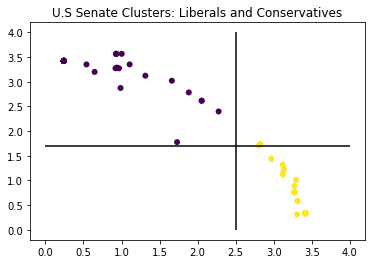

In [69]:
import matplotlib.pyplot as plt
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels, linewidths=0)
plt.vlines(2.5, 0, 4)
plt.hlines(1.7, 0, 4)
plt.title("U.S Senate Clusters: Liberals and Conservatives")
plt.show()

The cluster containing all Republicans and the three Democrats who broke with the Democratic Party falls left of X = 2.5 and are colored purple. The second cluster containing the majority of Democrats and the two Independents are to the right of X = 2.5 and are colored yellow.

## Most Extreme Senators

The most extreme Senators are those who are the furthest away from one cluster. For example, a radical Republican would be as far from the Democratic cluster as possible. Senators who are in between both clusters are more moderate, as they fall in between the views of the two parties. To identify the radical Senators of either party, this involves squaring the Senators' horizontal distances from the vertical line X = 2.5 since that line clearly shows the divide between the two clusters, much more so than the horizontal line Y=1.7. 

In [70]:
votes["extremism"] = (votes['X'] - 2.5)**2
votes.sort_values("extremism", inplace=True, ascending=False)
print(votes[['name','party','Kmeans cluster', 'extremism']].to_string())

          name party  Kmeans cluster  extremism
31       Ernst     R               0   5.098634
76     Roberts     R               0   5.098634
25       Crapo     R               0   5.098634
27      Daines     R               0   5.098634
83       Scott     R               0   5.098634
30        Enzi     R               0   5.098634
33     Fischer     R               0   5.098634
34       Flake     R               0   5.098634
39    Grassley     R               0   5.098634
40       Hatch     R               0   5.098634
77      Rounds     R               0   5.098634
45      Hoeven     R               0   5.098634
23      Cornyn     R               0   5.098634
46      Inhofe     R               0   5.098634
47     Isakson     R               0   5.098634
48     Johnson     R               0   5.098634
75       Risch     R               0   5.098634
72     Portman     R               0   5.098634
70      Perdue     R               0   5.098634
58      McCain     R               0   5

The 114th Congress didn't find any radical Democrats, but there were a handful of Republicans who stacked up the rankings in terms of extremism. Also in terms of extremism, the cluster dominated by Republicans shows a wider variance indicating more sub-clusters. Perhaps using two clusters may not be enough as there is a bit of clustering more in the center of this distribution. That may be the one cluster that would be commonly labeled as a group of moderate 'centrist' Democrats, Republicans, and Independents.

## Use 3 Clusters to Identify more Extreme Politicians

In [71]:
kmeans_model_3Cluster = KMeans(n_clusters=3, random_state=1)
senator_distances_3Cluster = kmeans_model_3Cluster.fit_transform(votes_copy.iloc[:,3:])
labels_3Cluster = kmeans_model_3Cluster.labels_
votes_copy['X'] = senator_distances_3Cluster[:,0]
votes_copy['Y'] = senator_distances_3Cluster[:,1]
votes_copy['Kmeans cluster'] = labels_3Cluster
print(votes_copy[['name','party','X','Y','Kmeans cluster']].to_string())

          name party         X         Y  Kmeans cluster
0    Alexander     R  3.209766  1.372072               1
1       Ayotte     R  2.711804  2.174566               2
2      Baldwin     D  0.214911  3.537965               0
3     Barrasso     R  3.500188  0.131136               1
4       Bennet     D  1.567304  3.100540               2
5   Blumenthal     D  0.214911  3.537965               0
6        Blunt     R  3.500188  0.131136               1
7       Booker     D  0.214911  3.537965               0
8      Boozman     R  3.500188  0.131136               1
9        Boxer     D  0.322303  3.431736               0
10       Brown     D  0.214911  3.537965               0
11        Burr     R  3.354298  0.989310               1
12    Cantwell     D  0.214911  3.537965               0
13      Capito     R  3.419594  0.507525               1
14      Cardin     D  0.214911  3.537965               0
15      Carper     D  1.268972  3.254861               0
16       Casey     D  1.268972 

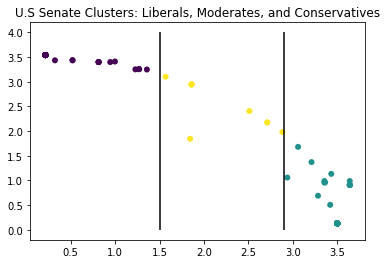

In [73]:
plt.scatter(x=senator_distances_3Cluster[:,0], y=senator_distances_3Cluster[:,1], c=labels_3Cluster, linewidths=0)
plt.vlines([1.5,2.9], 0, 4)
#plt.hlines(1.7, 0, 4)
plt.title("U.S Senate Clusters: Liberals, Moderates, and Conservatives")
plt.show()

The scatterplot of the 3-Mean Cluster Model shows a more realistic view of the current political climate in the United States. There is a small and spacious cluster of moderate Democrats, Republicans and Independents (colored yellow). The extreme conservative purple cluster and the extreme liberal green cluster are more condensed than the moderate cluster. This indicates there are two polar-opposite groups in Congress that vehemently oppose each other along with a smaller and fleeting group of neutral politicians.